Data analytics lab. 3 Tomasz Brania 23.03.2023

Prior and Posterior predictive distributions

We are testing a new vaccine, for which we performed a trial on 50 patients registering 7 allergic reactions. We want to verify what is the allergic reaction probability for new trial and what is the probability that it is lower than for normal vacine. We assume that each patient treatment is exchangeable.

In [2]:
from cmdstanpy import CmdStanModel
import arviz as az 
import numpy as np

In [3]:
N = 50  # number of patients
y = 7   # number of allergic reactions

Modeling prior predictive distribution

In [4]:
gen_quant_prior = CmdStanModel(stan_file='prior.stan')

INFO:cmdstanpy:compiling stan file /home/volume_for_DA/Lab3/prior.stan to exe file /home/volume_for_DA/Lab3/prior
INFO:cmdstanpy:compiled model executable: /home/volume_for_DA/Lab3/prior


In [5]:
samples_prior = gen_quant_prior.sample(fixed_param=True, iter_sampling=1000)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [6]:
df = samples_prior.draws_pd()
df.head()

,lp__,accept_stat__,N,y,p
0,0.0,0.0,50.0,5.0,0.049826
1,0.0,0.0,50.0,11.0,0.176649
2,0.0,0.0,50.0,4.0,0.167276
3,0.0,0.0,50.0,3.0,0.082597
4,0.0,0.0,50.0,10.0,0.246444


<AxesSubplot:>

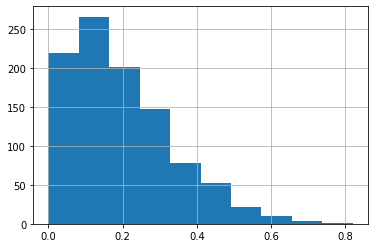

In [7]:
ratio_prior = df['y'] / df['N']
ratio_prior.hist()

In [17]:
ratio_prior_mean = ratio_prior.mean()
print("Ratio of allergic reactions: ", ratio_prior_mean)

Ratio of allergic reactions:  0.20112


Mean of the ratio is consistent with prior knowledge. Counted mean is very close to the value provided in the task (effectiveness of vaccine 20%).

Modeling posterior and posterior predictive distribution

In [9]:
gen_quant_posterior = CmdStanModel(stan_file='posterior.stan')

INFO:cmdstanpy:compiling stan file /home/volume_for_DA/Lab3/posterior.stan to exe file /home/volume_for_DA/Lab3/posterior
INFO:cmdstanpy:compiled model executable: /home/volume_for_DA/Lab3/posterior


In [10]:
samples_posterior = gen_quant_posterior.sample(data={'N':N, 'y':y})

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


In [11]:
df = samples_posterior.draws_pd()
df.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,p,y_pred
0,-25.4174,0.934425,0.827207,1.0,3.0,0.0,26.4908,0.135163,7.0
1,-25.3753,0.992182,0.827207,1.0,3.0,0.0,25.4857,0.157471,4.0
2,-25.4087,0.984437,0.827207,1.0,3.0,0.0,25.4800,0.136361,6.0
3,-25.5762,0.974654,0.827207,2.0,3.0,0.0,25.6575,0.121554,2.0
4,-25.4693,0.990739,0.827207,2.0,3.0,0.0,25.7003,0.129544,11.0


<AxesSubplot:>

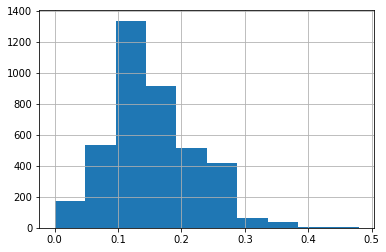

In [12]:
ratio_posterior = df['y_pred'] / N
ratio_posterior.hist()

In [13]:
ratio_posterior_mean = ratio_posterior.mean()
density_interval_posterior = az.hdi(np.array(ratio_posterior))

In [14]:
ratio_p = df['p'].mean()
density_interval_p = az.hdi(np.array(df['p']))

In [15]:
print("Expected value of predicted ratio: ", ratio_posterior_mean)
print("94% density interval of the predicted ratio:", density_interval_posterior)
print("\nExpected value of parameter p: ", ratio_p)
print("94% density interval of parameter p: ", density_interval_p)

Expected value of predicted ratio:  0.15228500000000003
94% density interval of the predicted ratio: [0.06 0.3 ]

Expected value of parameter p:  0.1525457739
94% density interval of parameter p:  [0.0722421 0.241939 ]


In [16]:
prob_sum = (ratio_posterior < 0.2).sum()
print("Number of simulated ratios that have smaller probability from traditional vaccines:", prob_sum)

prob = prob_sum / len(ratio_posterior)
print("Probability that ratio is lower than the average probability from traditional vaccines", prob)

Number of simulated ratios that have smaller probability from traditional vaccines: 2962
Probability that ratio is lower than the average probability from traditional vaccines 0.7405


Conclusions:

It was very interesting task. Topic of prior and posterior predictive distributions proved to be useful. As it turned out, new vaccine (accuracy ~ 15.2%) have about 74% chance to be worse than traditional vaccine (accuracy 20%).